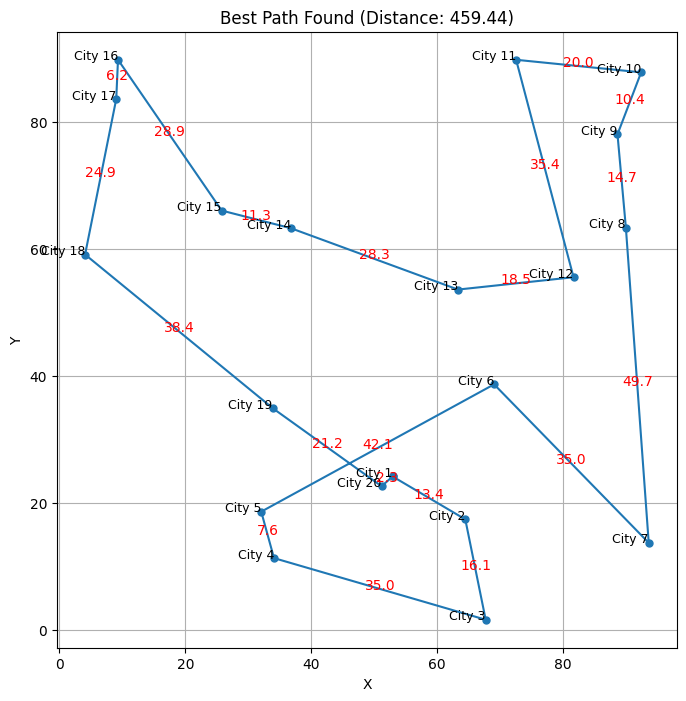

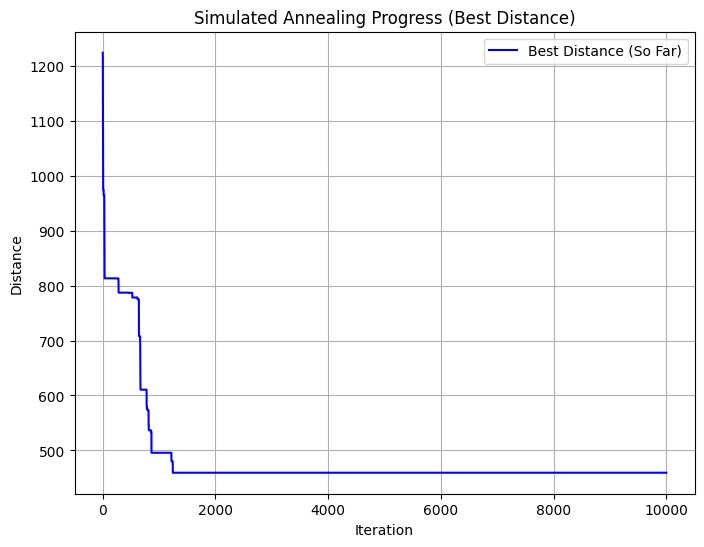

Best distance found: 459.44
Best path found: [14, 7, 5, 10, 3, 8, 9, 16, 19, 11, 18, 13, 1, 0, 12, 15, 2, 4, 17, 6]


In [5]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Define the number of cities and generate random city coordinates
num_cities = 20
cities = np.random.rand(num_cities, 2) * 100  # Random coordinates in 100x100 grid

# Function to calculate the distance between two cities
def calculate_distance(city1, city2):
    return np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)

# Function to calculate the total distance (energy) of the path
def total_distance(path):
    dist = 0
    for i in range(len(path) - 1):
        dist += calculate_distance(cities[path[i]], cities[path[i + 1]])
    dist += calculate_distance(cities[path[-1]], cities[path[0]])  # return to the start
    return dist

# Function to generate a neighboring solution (swap two cities)
def generate_neighbor(path):
    new_path = path.copy()
    i, j = random.sample(range(len(path)), 2)
    new_path[i], new_path[j] = new_path[j], new_path[i]
    return new_path

# Simulated Annealing Algorithm
def simulated_annealing(cities, initial_temp, cooling_rate, iterations):
    current_path = list(range(len(cities)))  # Initial path (e.g., 0, 1, 2, ..., n-1)
    random.shuffle(current_path)  # Randomize the path
    current_distance = total_distance(current_path)  # Calculate the initial distance
    best_path = current_path.copy()
    best_distance = current_distance
    temperature = initial_temp

    # List to store the best distances for visualization
    best_distances = [best_distance]

    for i in range(iterations):
        # Generate a neighboring solution
        new_path = generate_neighbor(current_path)
        new_distance = total_distance(new_path)

        # Acceptance probability
        if new_distance < current_distance:
            current_path = new_path
            current_distance = new_distance
            if current_distance < best_distance:
                best_path = current_path.copy()
                best_distance = current_distance
        else:
            delta_e = new_distance - current_distance
            acceptance_prob = math.exp(-delta_e / temperature)
            if random.random() < acceptance_prob:
                current_path = new_path
                current_distance = new_distance

        # Decrease temperature
        temperature *= cooling_rate

        # Store the best distance at each step for plotting
        best_distances.append(best_distance)

    return best_path, best_distance, best_distances

# Visualization function to plot the path with city labels and distances
def plot_path(cities, path, title):
    plt.figure(figsize=(8, 8))
    ordered_cities = cities[path + [path[0]]]  # Add the first city at the end to make the path circular
    plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], 'o-', markersize=5)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

    # Annotate the cities with their labels (City 1, City 2, ...)
    for i, city in enumerate(ordered_cities[:-1]):
        plt.text(city[0], city[1], f"City {i+1}", fontsize=9, ha='right')

    # Annotate distances between consecutive cities
    for i in range(len(path)):
        city1 = cities[path[i]]
        city2 = cities[path[(i + 1) % len(path)]]  # Wrap around for the last city
        distance = calculate_distance(city1, city2)
        mid_x = (city1[0] + city2[0]) / 2
        mid_y = (city1[1] + city2[1]) / 2
        plt.text(mid_x, mid_y, f"{distance:.1f}", fontsize=10, color='red', ha='center')

    plt.show()

# Visualization of the best distances during annealing
def plot_best_distances(best_distances):
    plt.figure(figsize=(8, 6))
    plt.plot(best_distances, label='Best Distance (So Far)', color='blue')
    plt.title('Simulated Annealing Progress (Best Distance)')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main Code
if __name__ == "__main__":
    # Parameters for Simulated Annealing
    initial_temp = 1000  # Initial temperature
    cooling_rate = 0.995  # Cooling rate (temperature reduction factor)
    iterations = 10000  # Number of iterations

    # Perform Simulated Annealing to solve the TSP
    best_path, best_distance, best_distances = simulated_annealing(cities, initial_temp, cooling_rate, iterations)

    # Visualize the best path found
    plot_path(cities, best_path, f"Best Path Found (Distance: {best_distance:.2f})")

    # Visualize the progress of the best distances during annealing
    plot_best_distances(best_distances)

    # Output the result
    print(f"Best distance found: {best_distance:.2f}")
    print(f"Best path found: {best_path}")
